In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unicodedata
import nltk
import acquire
import prepare
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

plt.rc('figure', figsize = (13, 7))
plt.style.use('seaborn-darkgrid')

1. Spam Data

    a. Load the spam data set.
    
    b.Create and explore bigrams for the spam data.Visualize them with a word cloud. How do they compare with the ham bigrams?
    
    c. Is there any overlap in the bigrams for the spam data and the ham data?
    
    d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [2]:
# acquire data from spam_db

from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [4]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [5]:
# let's get some insights on word frequency by taking our words back apart
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [6]:
ham_freq.head()

im      449
get     314
go      273
ok      272
dont    257
dtype: int64

In [7]:
spam_freq.head()

call    359
free    216
txt     150
ur      144
text    137
dtype: int64

In [8]:
# lets join these words together into a dataframe based 
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1
         ).fillna(0).astype(int)
word_counts.columns = ['ham','spam','all']
word_counts.head()

,ham,spam,all
im,449,13,462
get,314,83,397
go,273,31,304
ok,272,5,277
dont,257,22,279


visualization

ham vs spam count for 20 most common word

<AxesSubplot:>

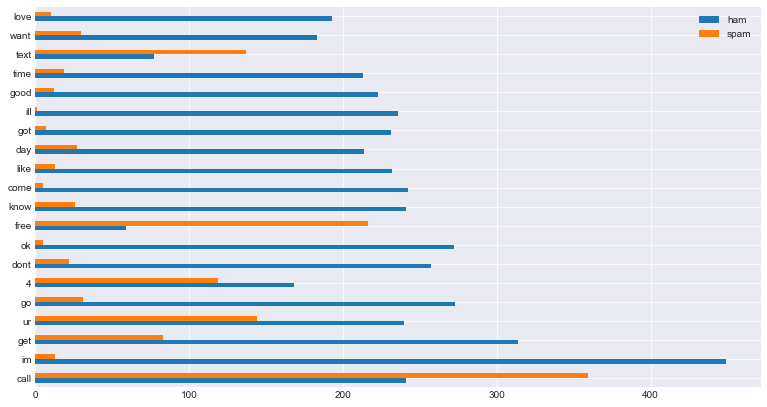

In [9]:
word_counts.sort_values(by = "all", ascending = False)[["ham","spam"]]\
.head(20).plot.barh()

Text(0.5, 1.0, '% of spam vs ham for the most common 20 words')

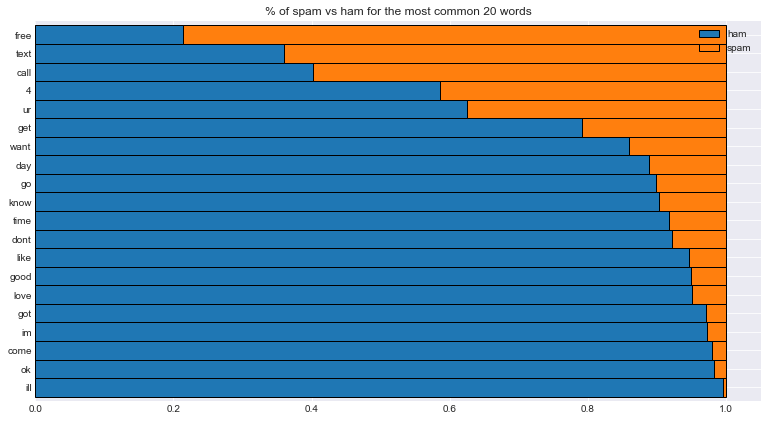

In [10]:
word_counts.sort_values("all", ascending = False)\
.head(20)\
.apply(lambda row:row/row["all"], axis = 1)\
.drop(columns = "all")\
.sort_values("spam")\
.plot.barh(stacked = True, width = 1, ec = "k", legend = True)
plt.title('% of spam vs ham for the most common 20 words')


biogram

In [11]:
# create bigrams for ham and spam words
ham_biogram = pd.Series(nltk.ngrams(ham_words,2)).value_counts().head(20)
spam_biogram = pd.Series(nltk.ngrams(spam_words,2)).value_counts().head(20)

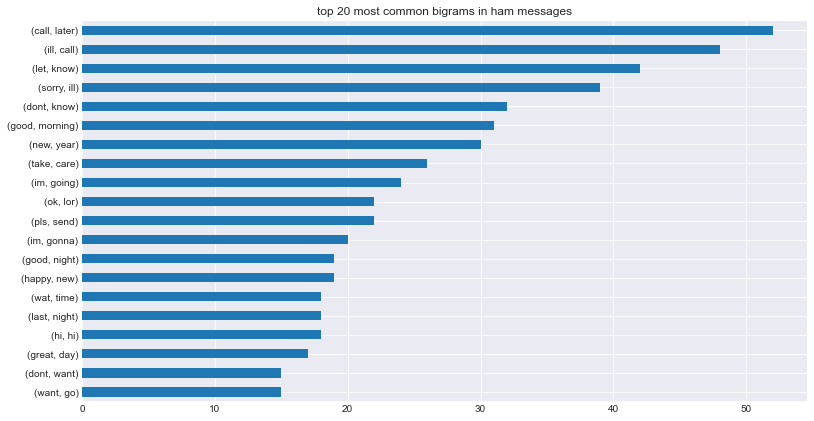

In [12]:
ham_biogram.sort_values(ascending = True).plot.barh()
plt.title('top 20 most common bigrams in ham messages')
plt.show()

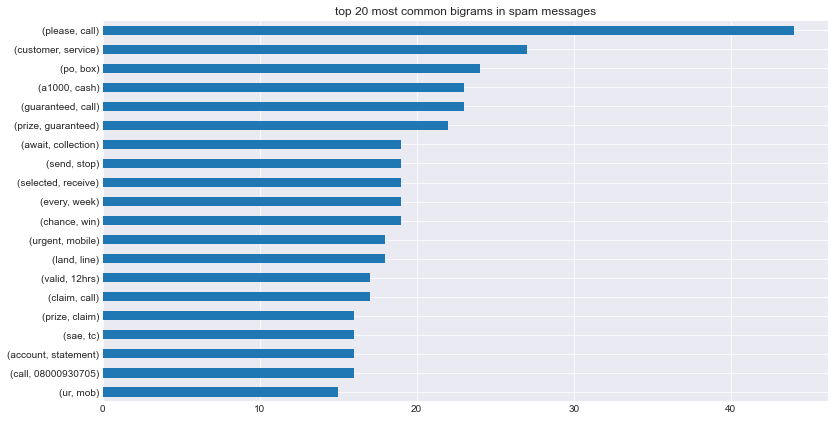

In [13]:
spam_biogram.sort_values(ascending = True).plot.barh()
plt.title('top 20 most common bigrams in spam messages')
plt.show()

Are there some bigrams that are common in both?

In [14]:
all_biogram = pd.Series(nltk.ngrams(all_words,2)).value_counts().head(20)

In [15]:
all_biogram.to_dict()

{('please', 'call'): 53,
 ('call', 'later'): 52,
 ('ill', 'call'): 48,
 ('let', 'know'): 42,
 ('sorry', 'ill'): 39,
 ('dont', 'know'): 38,
 ('new', 'year'): 32,
 ('good', 'morning'): 31,
 ('customer', 'service'): 29,
 ('take', 'care'): 26,
 ('po', 'box'): 25,
 ('im', 'going'): 24,
 ('a1000', 'cash'): 23,
 ('guaranteed', 'call'): 23,
 ('ok', 'lor'): 22,
 ('pls', 'send'): 22,
 ('prize', 'guaranteed'): 22,
 ('every', 'week'): 21,
 ('send', 'stop'): 20,
 ('4', 'ur'): 20}

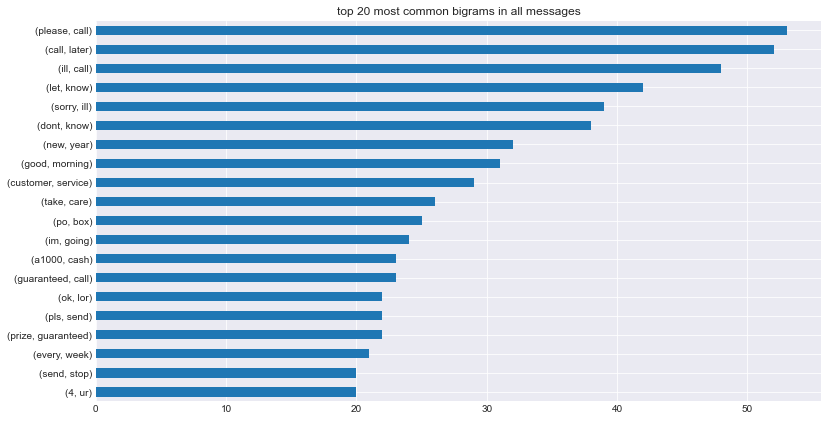

In [16]:
all_biogram.sort_values(ascending = True).plot.barh()
plt.title('top 20 most common bigrams in all messages')
plt.show()

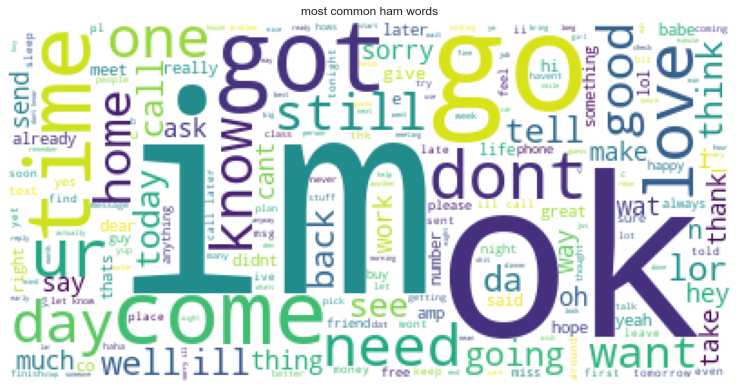

In [17]:
#word cloud for Ham words
img = WordCloud(background_color='white'
               ).generate(' '.join(ham_words))
plt.imshow(img)
plt.axis('off')
plt.title('most common ham words')
plt.show()

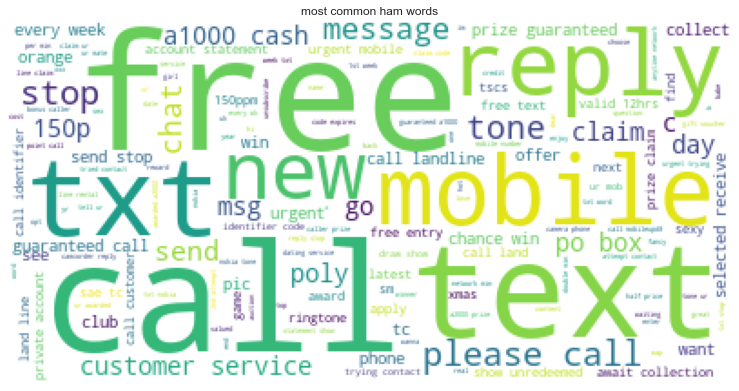

In [18]:
#word cloud for spam words
img = WordCloud(background_color='white'
               ).generate(' '.join(spam_words))
plt.imshow(img)
plt.axis('off')
plt.title('most common ham words')
plt.show()

In [19]:
#make trigrams
ham_trigram = pd.Series(nltk.ngrams(ham_words,3)).value_counts().head(20)
spam_trigram = pd.Series(nltk.ngrams(spam_words,3)).value_counts().head(20)

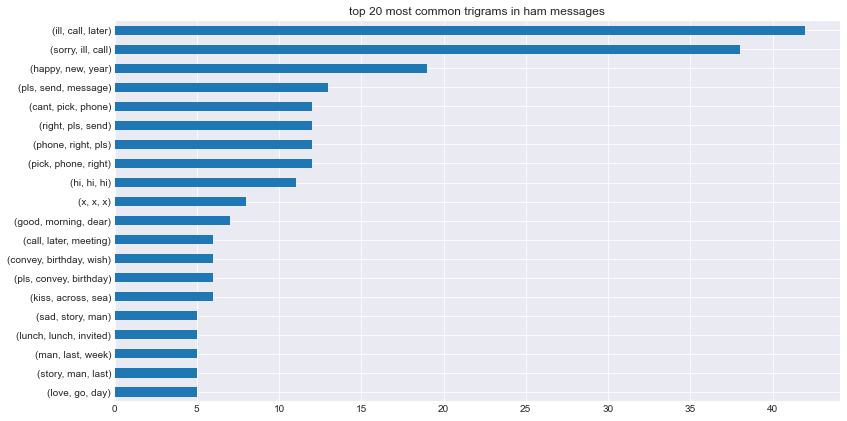

In [20]:
#plot trigram
ham_trigram.sort_values(ascending = True).plot.barh()
plt.title('top 20 most common trigrams in ham messages')
plt.show()

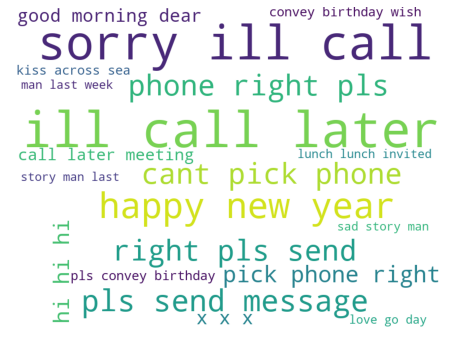

In [21]:
#plot trigram
prepare.plot_trigrams(ham_trigram)

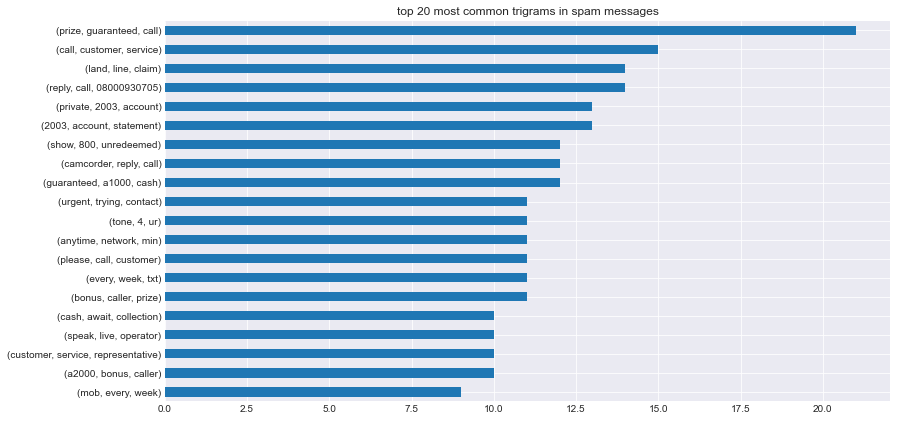

In [22]:
#plot spam trigram
spam_trigram.sort_values(ascending = True).plot.barh()
plt.title('top 20 most common trigrams in spam messages')
plt.show()

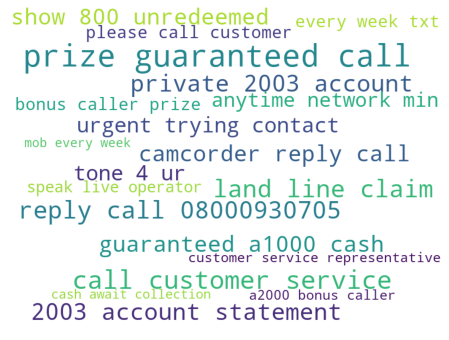

In [23]:
#plot wordcloud from trigram
prepare.plot_trigrams(spam_trigram)

### 2. Explore the blog articles using the techniques discussed in the exploration lesson

In [24]:
base_url = 'https://codeup.com/blog/'

In [25]:
codeup_df = acquire.get_blog_content(base_url)
codeup_df

,title,content
0,Coding Bootcamp or Computer Science Degree?,"For many people, deciding between a coding boo..."
1,Diversity Equity and Inclusion Report,Codeup is excited to launch our first Diversit...
2,Codeup Honored as SABJ Diversity and Inclusion...,Codeup has been named the 2022 Diversity and I...
3,How Can I Finance My Career Transition?,Deciding to transition into a tech career is a...
4,Tips for Women Beginning a Career in Tech,"Codeup strongly values diversity, and inclusio..."
5,What is Cloud Computing and AWS?,With many companies switching to cloud service...


In [26]:
df = prepare.prepare_blog_df(codeup_df)
df

,title,content,clean,stemmed,lemmatized,cleaned_up
0,Coding Bootcamp or Computer Science Degree?,"For many people, deciding between a coding boo...",for many people deciding between a coding boot...,for mani peopl decid between a code bootcamp a...,for many people deciding between a coding boot...,many people deciding coding bootcamp computer ...
1,Diversity Equity and Inclusion Report,Codeup is excited to launch our first Diversit...,codeup is excited to launch our first diversit...,codeup is excit to launch our first divers equ...,codeup is excited to launch our first diversit...,codeup excited launch first diversity equity i...
2,Codeup Honored as SABJ Diversity and Inclusion...,Codeup has been named the 2022 Diversity and I...,codeup has been named the 2022 diversity and i...,codeup ha been name the 2022 divers and inclus...,codeup ha been named the 2022 diversity and in...,codeup ha named 2022 diversity inclusion award...
3,How Can I Finance My Career Transition?,Deciding to transition into a tech career is a...,deciding to transition into a tech career is a...,decid to transit into a tech career is a big s...,deciding to transition into a tech career is a...,deciding transition tech career big step signi...
4,Tips for Women Beginning a Career in Tech,"Codeup strongly values diversity, and inclusio...",codeup strongly values diversity and inclusion...,codeup strongli valu divers and inclus in hono...,codeup strongly value diversity and inclusion ...,codeup strongly value diversity inclusion hono...
5,What is Cloud Computing and AWS?,With many companies switching to cloud service...,with many companies switching to cloud service...,with mani compani switch to cloud servic and i...,with many company switching to cloud service a...,many company switching cloud service implement...


In [27]:
#create wordcloud
#first combine all cleaned up column words using join
blog_words = ' '.join(df['cleaned_up'])
blog_words[0:200]

'many people deciding coding bootcamp computer science degree tough would like lend hand comparing program shed light key similarity difference codeup degree key difference 1 time commitment codeups pr'

(-0.5, 399.5, 199.5, -0.5)

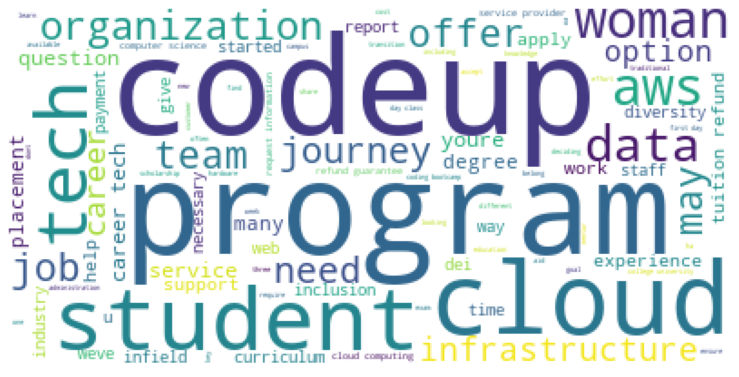

In [28]:
#create wordcloud
img = WordCloud(background_color="white").generate(blog_words)
plt.imshow(img)
plt.axis("off")

In [29]:
#lets draw bigram
blog_biogram = pd.Series(nltk.ngrams(blog_words.split(),2)).value_counts().head(20)

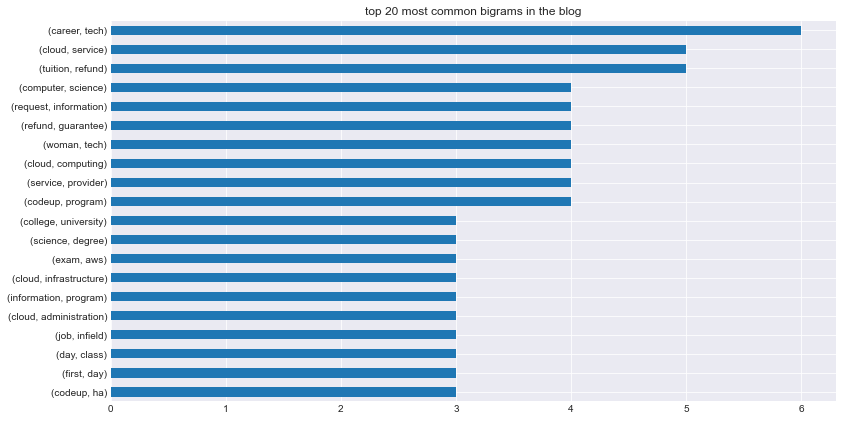

In [30]:
#plot biogram
blog_biogram.sort_values(ascending = True).plot.barh()
plt.title('top 20 most common bigrams in the blog')
plt.show()

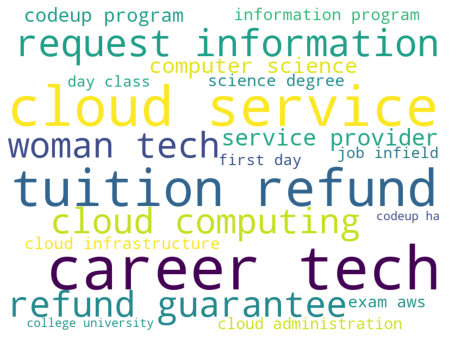

In [32]:
#plot wordcloud from biogram
prepare.plot_bigrams(blog_biogram)

In [33]:
#lets draw trigram
blog_trigram = pd.Series(nltk.ngrams(blog_words.split(),3)).value_counts().head(20)

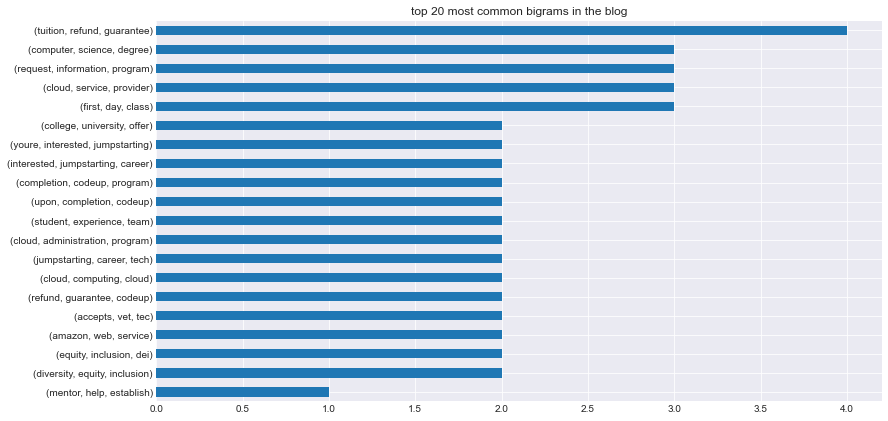

In [34]:
#plot biogram
blog_trigram.sort_values(ascending = True).plot.barh()
plt.title('top 20 most common bigrams in the blog')
plt.show()

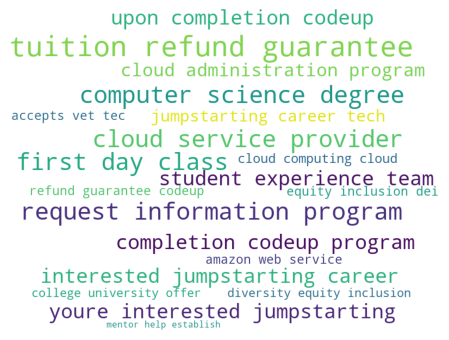

In [35]:
#make wordcloud from trigram
prepare.plot_trigrams(blog_trigram)

### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring

In [36]:
base_url = "https://inshorts.com/en/read"

In [37]:
#acquire data
news_df = acquire.get_all_shorts(base_url)
news_df

,title,category,body
0,"AAP drops Rajouri Garden candidate, a week bef...",india,"Only a week before Delhi Assembly polls, Aam A..."
1,"Indian Navy gets VLF, easy communication with ...",india,The Indian navy has a new communication system...
2,India's first Billiards Premier League,india,The Billiards and Snooker Association of Mahar...
3,Infosys Gifts Sikka Shares Worth Rs 8.2cr,india,"In a regulatory filing to the BSE on Friday, I..."
4,Zimbabwe players ask India for cricketing tips,india,After getting thrashed by India by 5-0 in the ...
...,...,...,...
281,Amazon-backed Rivian's shares fall 9% after it...,automobile,Amazon-backed EV-maker Rivian on Friday recall...
282,"Honda Motor, LG to build $4.4 billion EV batte...",automobile,Honda Motor and LG Energy Solution on Tuesday ...
283,Passenger vehicle wholesales rise by 92% in Se...,automobile,Passenger vehicle wholesales in India surged b...
284,Delhi to get 100 electric vehicle charging sta...,automobile,Delhi CM Arvind Kejriwal on Tuesday said the c...


In [38]:
#all cleaned up file
df = prepare.prepare_news_df(news_df)
df.head()

,category,original,clean,stemmed,lemmatized,cleaned_up
0,india,"Only a week before Delhi Assembly polls, Aam A...",only a week before delhi assembly polls aam aa...,onli a week befor delhi assembl poll aam aadmi...,only a week before delhi assembly poll aam aad...,week delhi assembly poll aam aadmi party tuesd...
1,india,The Indian navy has a new communication system...,the indian navy has a new communication system...,the indian navi ha a new commun system critic ...,the indian navy ha a new communication system ...,indian navy ha new communication system critic...
2,india,The Billiards and Snooker Association of Mahar...,the billiards and snooker association of mahar...,the billiard and snooker associ of maharashtra...,the billiards and snooker association of mahar...,billiards snooker association maharashtrabsam ...
3,india,"In a regulatory filing to the BSE on Friday, I...",in a regulatory filing to the bse on friday in...,in a regulatori file to the bse on friday info...,in a regulatory filing to the bse on friday in...,regulatory filing bse friday infosys ltd decid...
4,india,After getting thrashed by India by 5-0 in the ...,after getting thrashed by india by 50 in the j...,after get thrash by india by 50 in the just co...,after getting thrashed by india by 50 in the j...,getting thrashed india 50 concluded odi series...


In [39]:
#create a function to split back word counts on a column
def get_word_counts(df, column):
    #join all objects of all columns
    word = ' '.join(df[column])
    #split 
    word_list = word.split()
    # run value count
    word_count = pd.Series(word_list).value_counts()
    return word_count

In [40]:
df.category.unique()

array(['india', 'business', 'sports', 'world', 'politics', 'technology',
       'startup', 'entertainment', 'miscellaneous', 'hatke', 'science',
       'automobile'], dtype=object)

In [41]:
#make subsett of each category
india_df = df[df.category == "india"]
business_df = df[df.category == "business"]
sports_df = df[df.category == "sports"]
others_df = df[(df.category != "india") & (df.category != "business") & (df.category != "sports")]

In [42]:
india_word_count = get_word_counts(india_df, "cleaned_up")
business_word_count = get_word_counts(business_df, "cleaned_up")
sports_word_count = get_word_counts(sports_df, "cleaned_up")
others_word_count = get_word_counts(others_df, "cleaned_up")
all_word_count = get_word_counts(df, "cleaned_up")                         

In [43]:
wordcount_df = pd.concat([india_word_count, business_word_count, sports_word_count, others_word_count, all_word_count], axis = 1).fillna(0)
wordcount_df.columns = ["india", "business", "sports", "others","all"]
wordcount_df.head(5)

,india,business,sports,others,all
india,10.0,12.0,16.0,25.0,63
ha,7.0,7.0,21.0,106.0,141
new,5.0,2.0,0.0,32.0,39
said,5.0,17.0,15.0,134.0,171
final,4.0,0.0,0.0,0.0,4


<AxesSubplot:>

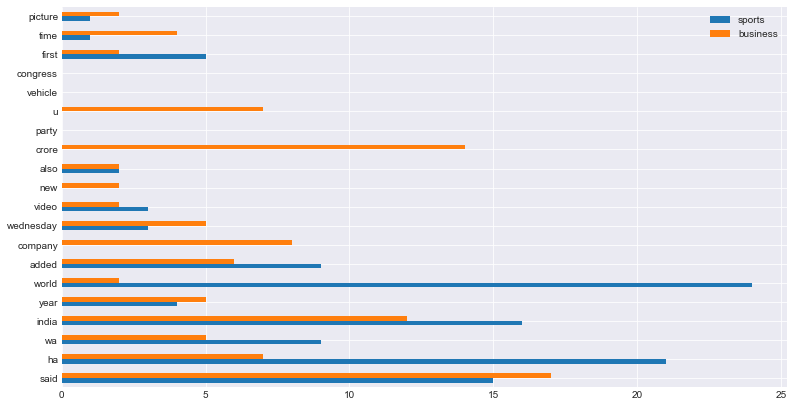

In [44]:
wordcount_df.sort_values("all", ascending = False)\
[["sports","business"]].head(20).plot.barh()

<AxesSubplot:>

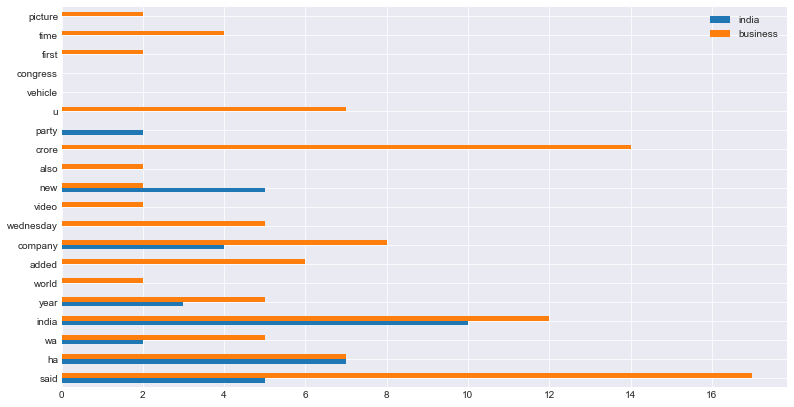

In [45]:
wordcount_df.sort_values("all", ascending = False)\
[["india","business"]].head(20).plot.barh()

wordcloud

Text(0.5, 1.0, 'most common word in india category')

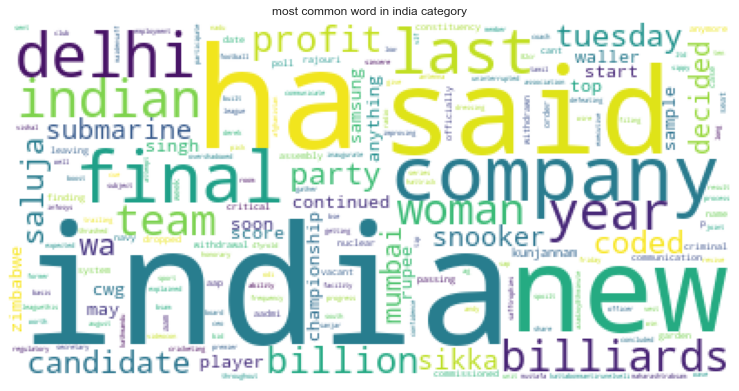

In [46]:
#plot wordcloud for cateogory india
img = WordCloud(background_color = "white").generate(' '.join(india_df.cleaned_up))
plt.imshow(img)
plt.axis("off")
plt.title("most common word in india category")

Text(0.5, 1.0, 'most common word in india category')

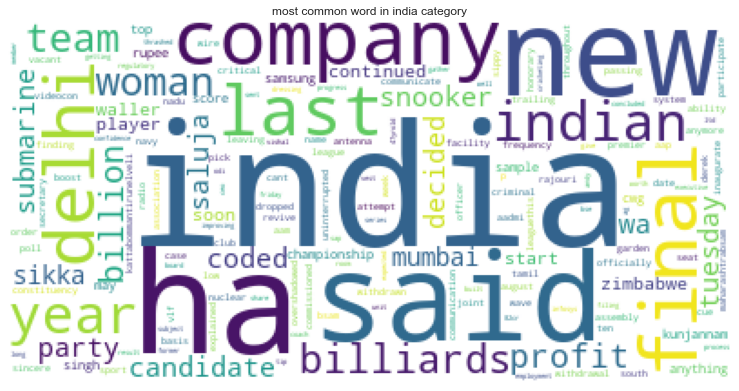

In [47]:
#plot wordcloud for category india
img = WordCloud(background_color = "white").generate(' '.join(india_df.cleaned_up))
plt.imshow(img)
plt.axis("off")
plt.title("most common word in india category")

Text(0.5, 1.0, 'most common word in sports category')

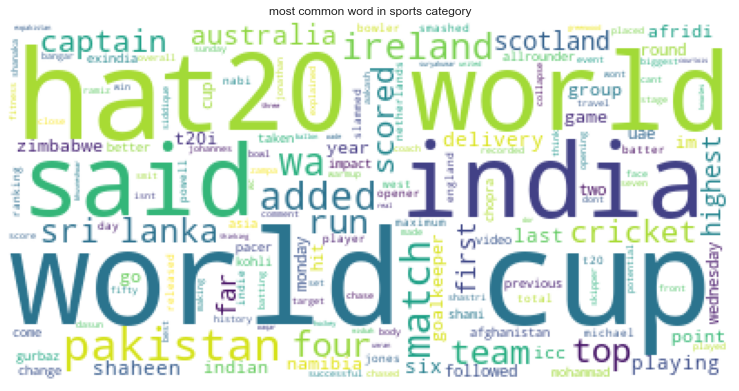

In [48]:
#plot wordcloud for category sports
img = WordCloud(background_color = "white").generate(' '.join(sports_df.cleaned_up))
plt.imshow(img)
plt.axis("off")
plt.title("most common word in sports category")

Text(0.5, 1.0, 'most common word in others category')

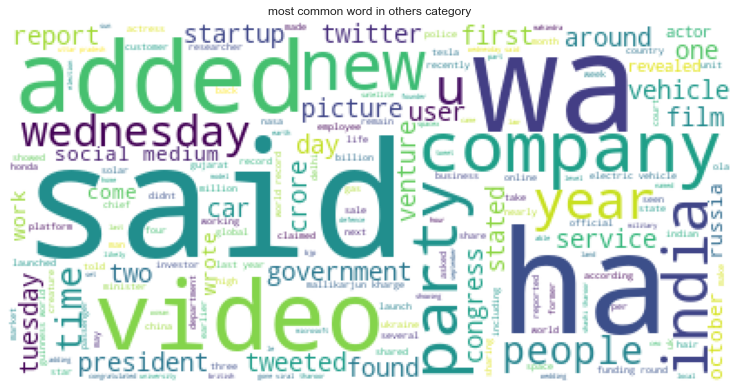

In [49]:
#plot wordcloud for cateogory others
img = WordCloud(background_color = "white").generate(' '.join(others_df.cleaned_up))
plt.imshow(img)
plt.axis("off")
plt.title("most common word in others category")